In [1]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns
import numpy as np
import pandas as pd

import scipy as sp

In [2]:
total_bound = pd.read_csv("./Total_boundary2.csv",header=2,names=["resolution","CP190","MM4_N","MM4_T","random"])

In [3]:
total_bound2 = total_bound.melt(id_vars="resolution")

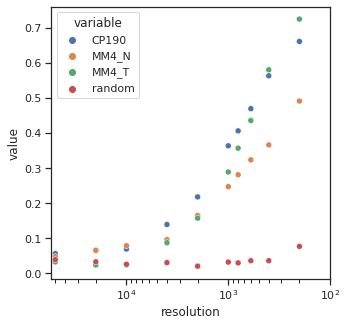

In [4]:
sns.set()
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (5,5))
plt.xlim(55000,100)
ax.set_xscale("log") 
sns.scatterplot(x="resolution",y="value",hue="variable",data=total_bound2)
plt.savefig("Total_boundary.pdf")

In [5]:
percent_bound = pd.read_csv("./Percent_boundary.csv",header=1,names=["resolution","CP190","MM4_N","MM4_T"])
percent_bound2 = percent_bound.melt(id_vars="resolution")

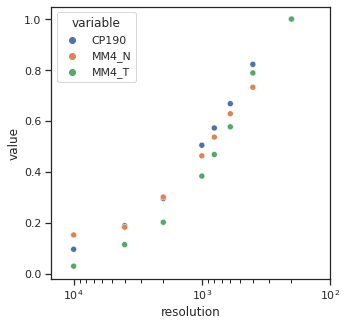

In [6]:
sns.set()
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (5,5))
plt.xlim(15000,100)
ax.set_xscale("log") 
sns.scatterplot(x="resolution",y="value",hue="variable",data=percent_bound2)
plt.savefig("percent_bound.pdf")

In [7]:
ins_change = pd.DataFrame([[104,21],[137,13]],index=["insulation_down","insulation_up"],columns=["Total","overlap_M4N"])
ins_change["overlap_percent"] = ins_change["overlap_M4N"]/ins_change["Total"]
ins_change["non_overlap_percent"] = 1 - ins_change["overlap_percent"]

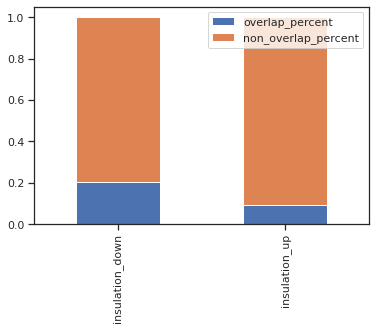

In [8]:
ax = ins_change[["overlap_percent","non_overlap_percent"]].plot.bar(stacked=True) 
fig = ax.get_figure()

plt.savefig("change_region.pdf")

ここからpolIIの対象の遺伝子発現のplot

In [9]:
exp_data = pd.DataFrame({"comm":[0.586417475,0.558643569,0.668963777,0.414659773],"CG9628":[0.135841858,0.281264621,0.297301779,0.21915143]})
exp_data = exp_data.melt()

In [10]:
exp_data = exp_data.append({"variable": "control1","value": 1},ignore_index=True)
exp_data = exp_data.append({"variable": "control2","value": 1},ignore_index=True)

In [11]:
exp_data

,variable,value
0,comm,0.586417
1,comm,0.558644
2,comm,0.668964
3,comm,0.414660
4,CG9628,0.135842
5,CG9628,0.281265
6,CG9628,0.297302
7,CG9628,0.219151
8,control1,1.000000
9,control2,1.000000


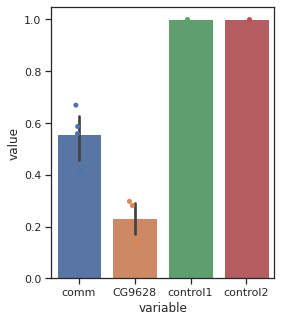

In [12]:
fig, ax = plt.subplots(figsize = (4,5))
sns.stripplot(x="variable",y="value",data=exp_data)
sns.barplot(x="variable",y="value",data=exp_data)
plt.savefig('exp_M4N.pdf', bbox_inches='tight')

In [13]:
comm =  exp_data[exp_data["variable"]=="comm"]["value"]
CG9628 =  exp_data[exp_data["variable"]=="CG9628"]["value"]
t, p = sp.stats.ttest_1samp(CG9628, popmean=1)

In [14]:
p

0.00023848328356691927

In [15]:
hatch_rate = pd.read_csv("./Fly_hatch.csv")

hatch_rate["pair"] = hatch_rate["female"]+"-"+hatch_rate["male"]
hatch_rate["Egg_per_fly"] = hatch_rate["Egg"]/hatch_rate["num"]
hatch_rate["hatch_rate"] = hatch_rate["Hatch"]/hatch_rate["Egg"]*100
hatch_rate = hatch_rate.fillna(0)

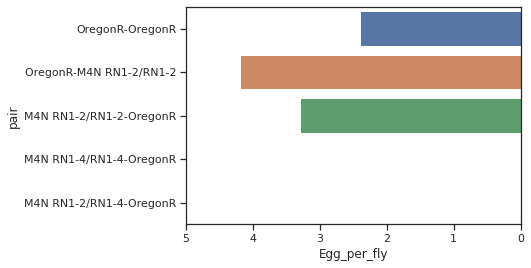

In [16]:
f, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([5, 0])
sns.barplot(x="Egg_per_fly",y="pair",data=hatch_rate)
plt.savefig("./Egg_per_fly.pdf")

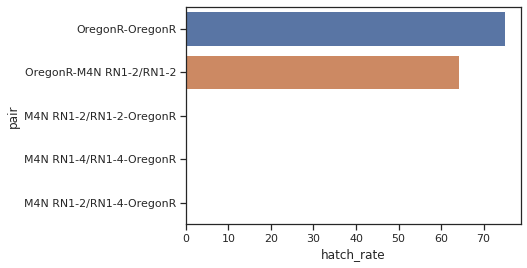

In [17]:
f, ax = plt.subplots(figsize=(6, 4))
sns.set_theme(style="whitegrid")
sns.barplot(x="hatch_rate",y="pair",data=hatch_rate)
plt.savefig("./hatch_rate.pdf")

In [63]:
hatch_rate

,female,male,num,Egg,Hatch,pair,Egg_per_fly,hatch_rate
0,OregonR,OregonR,10,24,18,OregonR-OregonR,2.4,75.000000
1,OregonR,M4N RN1-2/RN1-2,10,42,27,OregonR-M4N RN1-2/RN1-2,4.2,64.285714
2,M4N RN1-2/RN1-2,OregonR,10,33,0,M4N RN1-2/RN1-2-OregonR,3.3,0.000000
3,M4N RN1-4/TM6C,OregonR,10,37,14,M4N RN1-4/TM6C-OregonR,3.7,37.837838
4,M4N RN1-4/RN1-4,OregonR,10,0,0,M4N RN1-4/RN1-4-OregonR,0.0,0.000000
5,M4N RN1-2/RN1-4,OregonR,7,0,0,M4N RN1-2/RN1-4-OregonR,0.0,0.000000


In [86]:
Fly_HetA_exp = pd.DataFrame({"y1w1118":[0.015197734,0.02664484,0.020333466,0.018198962,0.018198962,0.021196943],
                            "RN1-2":[0.251738888,0.558643569,0.200267469,0.650670928,0.503477775,0.071793647],
                            "RN1-4":[0.179244406,0.103664943,0.091505356,0.194791145,0.067920929,np.nan]})
mean_val = Fly_HetA_exp["y1w1118"].mean()

In [87]:
Fly_HetA_exp = Fly_HetA_exp.melt().dropna()

In [88]:
Fly_HetA_exp["value"] = Fly_HetA_exp["value"]/mean_val

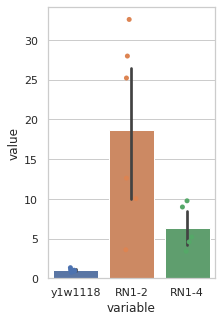

In [89]:
fig, ax = plt.subplots(figsize = (3,5))
sns.stripplot(x="variable",y="value",data=Fly_HetA_exp)
sns.barplot(x="variable",y="value",data=Fly_HetA_exp)
plt.savefig('Fly_HetA.pdf', bbox_inches='tight')